In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
from TargetDistributions.DoubleWell import ManyWellEnergy
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well
torch.set_default_dtype(torch.float64)

In [3]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours_many_well(*args, **kwargs)
    plt.show()

In [4]:
target = ManyWellEnergy(a=-0.5, b=-6)

# kl divergence

In [5]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 4
epochs = int(1e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 2e-4
weight_decay = 1e-5
clip_grad_norm = True
optimizer = "Adam"
flow_type = "RealNVP"
loss_type = "kl"
initial_flow_scaling = 2.0
n_flow_steps = 64
annealing = True
n_plots = 20
flow_kwargs = {"use_exp": False}

In [6]:
torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type, **flow_kwargs)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

In [7]:
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(info_before["effective_sample_size"]/n_samples_estimation)

tensor(0.0082)


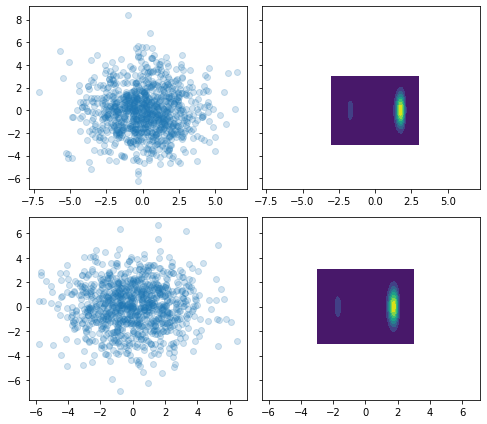

In [8]:
plotter(tester)

loss: -7.8917179702628655, mean log p_x -59.86391607795524:   0%|          | 0/10000 [00:00<?, ?it/s]

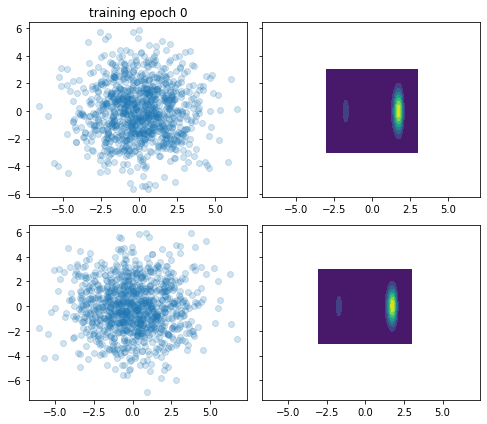

loss: -8.283868786028155, mean log p_x -0.2737010967477788:   5%|▌         | 500/10000 [01:41<32:11,  4.92it/s]

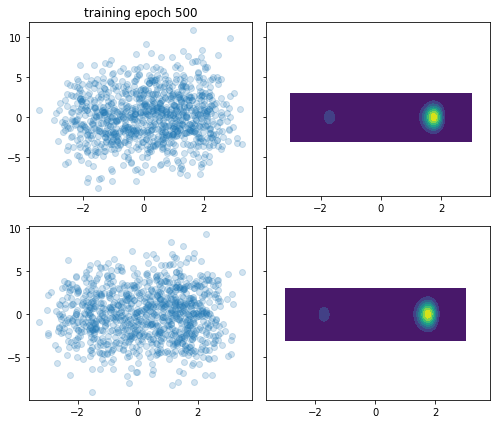

loss: -8.283868786028155, mean log p_x -0.2737010967477788:   5%|▌         | 502/10000 [01:42<54:11,  2.92it/s]  

ESS is 0.00611194890502786


loss: -8.800151740584544, mean log p_x 6.551029622859255:  10%|█         | 1000/10000 [03:23<29:39,  5.06it/s] 

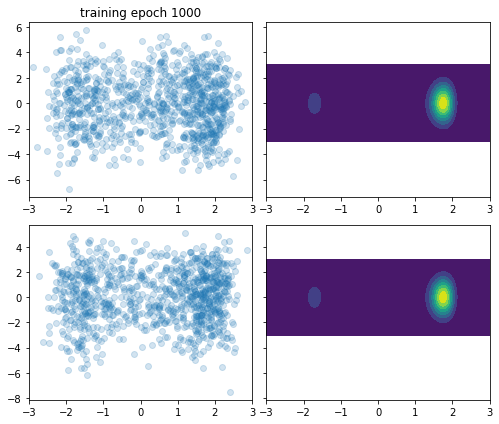

loss: -8.800151740584544, mean log p_x 6.551029622859255:  10%|█         | 1001/10000 [03:23<1:03:52,  2.35it/s]

ESS is 0.013790088663752658


loss: -9.818756057711955, mean log p_x 9.912376725638586:  15%|█▌        | 1500/10000 [05:04<27:31,  5.15it/s]  

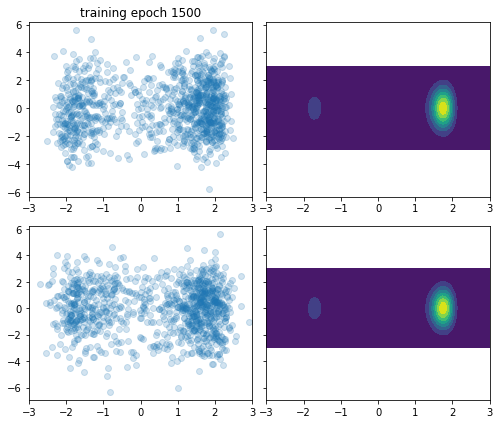

loss: -9.818756057711955, mean log p_x 9.912376725638586:  15%|█▌        | 1501/10000 [05:05<58:01,  2.44it/s]

ESS is 0.030690998651849342


loss: -11.093287587619313, mean log p_x 12.362839622699907:  20%|██        | 2000/10000 [06:47<25:59,  5.13it/s]

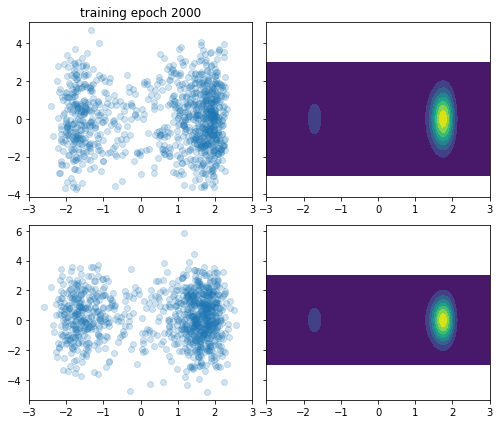

loss: -11.093287587619313, mean log p_x 12.362839622699907:  20%|██        | 2002/10000 [06:48<45:52,  2.91it/s]

ESS is 0.06207185432808659


loss: -12.429637825261329, mean log p_x 13.781064487333058:  25%|██▌       | 2500/10000 [08:29<24:38,  5.07it/s]

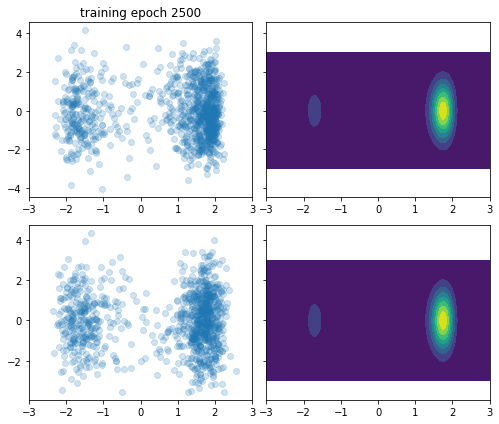

loss: -12.429637825261329, mean log p_x 13.781064487333058:  25%|██▌       | 2501/10000 [08:30<55:19,  2.26it/s]

ESS is 0.10882233546392987


loss: -13.937253819067546, mean log p_x 14.802986967550162:  30%|███       | 3000/10000 [10:11<22:33,  5.17it/s]

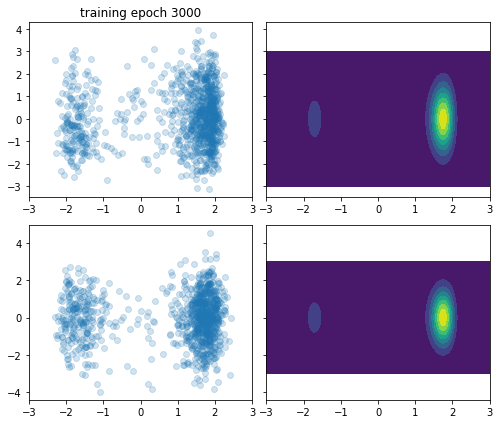

loss: -13.937253819067546, mean log p_x 14.802986967550162:  30%|███       | 3001/10000 [10:12<48:01,  2.43it/s]

ESS is 0.164242797889481


loss: -15.529653806477585, mean log p_x 15.37170687880968:  35%|███▌      | 3500/10000 [11:53<21:02,  5.15it/s] 

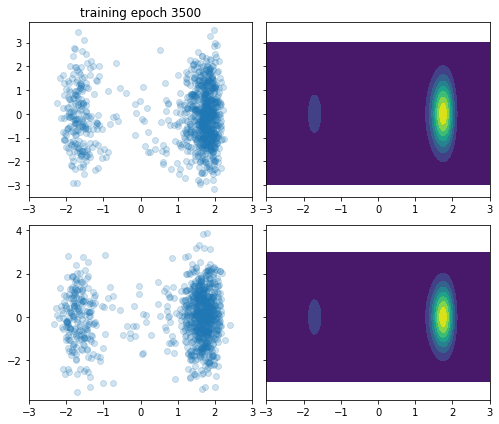

loss: -15.529653806477585, mean log p_x 15.37170687880968:  35%|███▌      | 3501/10000 [11:54<43:14,  2.50it/s]

ESS is 0.2248604639822238


loss: -16.198748002075483, mean log p_x 15.760245675691731:  38%|███▊      | 3750/10000 [12:45<18:57,  5.49it/s]

Nan/Inf loss encountered


loss: -16.198748002075483, mean log p_x 15.760245675691731:  38%|███▊      | 3785/10000 [12:52<18:17,  5.66it/s]

Nan/Inf loss encountered


loss: -16.485566386805754, mean log p_x 15.70624462016638:  39%|███▊      | 3866/10000 [13:08<19:17,  5.30it/s] 

Nan/Inf loss encountered


loss: -17.154789470345126, mean log p_x 15.99137454147223:  40%|████      | 4000/10000 [13:35<20:03,  4.99it/s] 

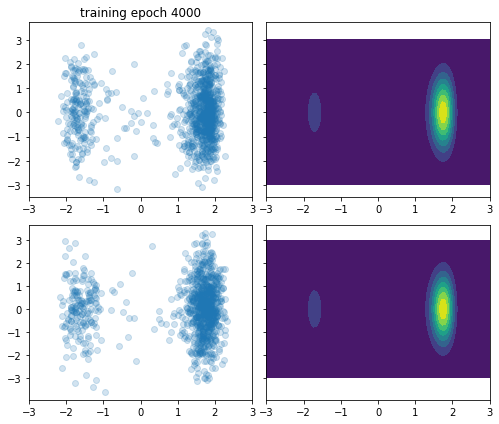

loss: -17.154789470345126, mean log p_x 15.99137454147223:  40%|████      | 4002/10000 [13:36<34:20,  2.91it/s]

ESS is 0.28280369338439837


loss: -18.863737728761567, mean log p_x 16.634197335080664:  45%|████▌     | 4500/10000 [15:17<18:52,  4.86it/s]

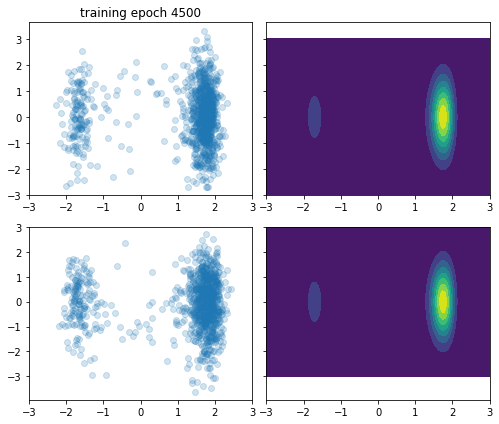

loss: -18.863737728761567, mean log p_x 16.634197335080664:  45%|████▌     | 4501/10000 [15:18<39:49,  2.30it/s]

ESS is 0.337670236605081


loss: -19.867113783854766, mean log p_x 16.72655506950934:  48%|████▊     | 4838/10000 [16:25<14:52,  5.78it/s] 

Nan/Inf loss encountered


loss: -19.867113783854766, mean log p_x 16.72655506950934:  49%|████▉     | 4879/10000 [16:33<14:53,  5.73it/s]

Nan/Inf loss encountered


loss: -20.457270965279832, mean log p_x 16.992029922099334:  50%|█████     | 5000/10000 [16:58<16:19,  5.10it/s]

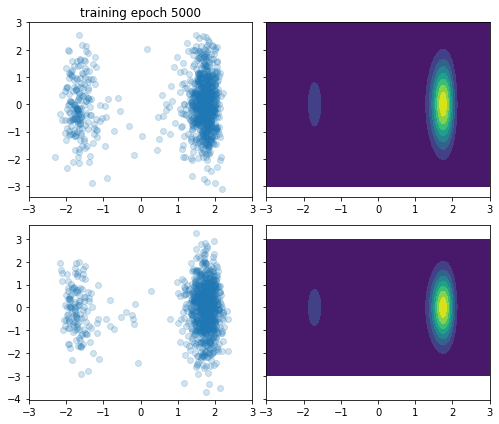

loss: -20.457270965279832, mean log p_x 16.992029922099334:  50%|█████     | 5001/10000 [16:59<33:44,  2.47it/s]

ESS is 0.3713331443017528


loss: -20.456724813826362, mean log p_x 16.95798297489766:  51%|█████▏    | 5133/10000 [17:25<15:15,  5.32it/s] 

Nan/Inf loss encountered


loss: -20.37818351225475, mean log p_x 16.896680367570543:  53%|█████▎    | 5252/10000 [17:49<12:01,  6.58it/s]

Nan/Inf loss encountered


loss: -20.37818351225475, mean log p_x 16.896680367570543:  53%|█████▎    | 5255/10000 [17:49<12:15,  6.45it/s]

Nan/Inf loss encountered


loss: -20.416757302077105, mean log p_x 16.95474904996247:  53%|█████▎    | 5328/10000 [18:04<13:35,  5.73it/s]

Nan/Inf loss encountered


loss: -20.378115966031597, mean log p_x 16.980120209409584:  55%|█████▌    | 5500/10000 [18:39<14:52,  5.04it/s]

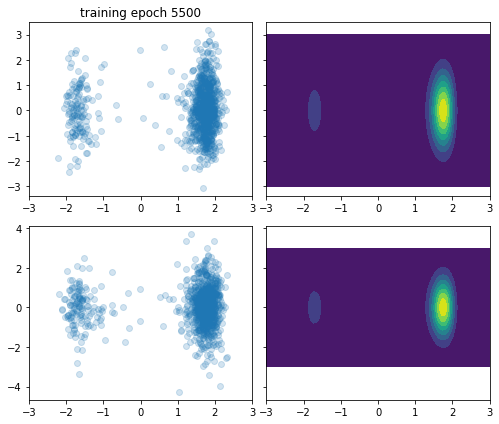

loss: -20.378115966031597, mean log p_x 16.980120209409584:  55%|█████▌    | 5502/10000 [18:39<25:15,  2.97it/s]

ESS is nan


loss: -20.428878407768206, mean log p_x 17.103170275631456:  60%|██████    | 6000/10000 [20:20<13:10,  5.06it/s]

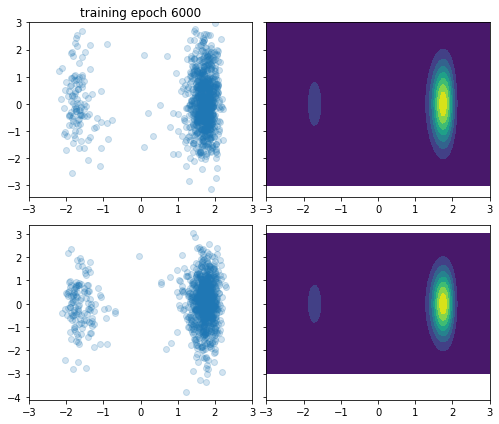

loss: -20.428878407768206, mean log p_x 17.103170275631456:  60%|██████    | 6002/10000 [20:21<23:36,  2.82it/s]

ESS is nan


loss: -20.46398631920835, mean log p_x 17.0385180906153:  63%|██████▎   | 6339/10000 [21:29<11:35,  5.26it/s]   

Nan/Inf loss encountered


loss: -20.46398631920835, mean log p_x 17.0385180906153:  64%|██████▎   | 6371/10000 [21:35<10:00,  6.04it/s]

Nan/Inf loss encountered


loss: -20.50106980772907, mean log p_x 17.21909815338289:  65%|██████▌   | 6500/10000 [22:01<11:24,  5.11it/s]  

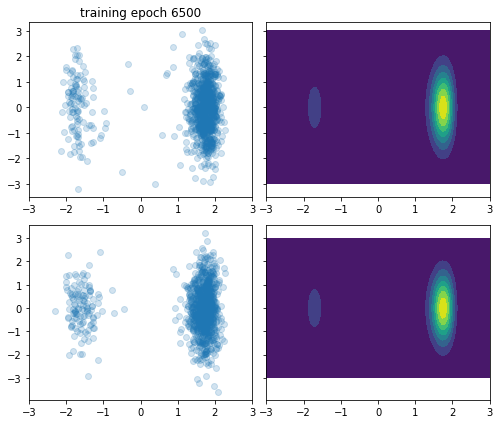

loss: -20.50106980772907, mean log p_x 17.21909815338289:  65%|██████▌   | 6502/10000 [22:02<20:12,  2.89it/s]

ESS is nan


loss: -20.458624135826547, mean log p_x 17.181031065773855:  70%|███████   | 7000/10000 [23:40<09:18,  5.37it/s]

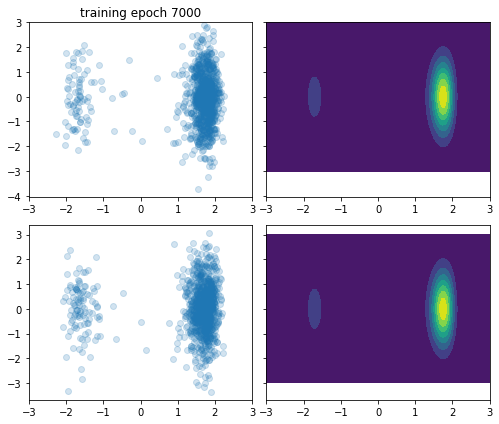

loss: -20.458624135826547, mean log p_x 17.181031065773855:  70%|███████   | 7002/10000 [23:41<16:04,  3.11it/s]

ESS is nan


loss: -20.446444286884542, mean log p_x 17.000984964213675:  74%|███████▍  | 7404/10000 [25:00<08:03,  5.37it/s]

Nan/Inf loss encountered


loss: -20.5033068061207, mean log p_x 17.215173722201367:  75%|███████▌  | 7500/10000 [25:19<07:49,  5.32it/s]  

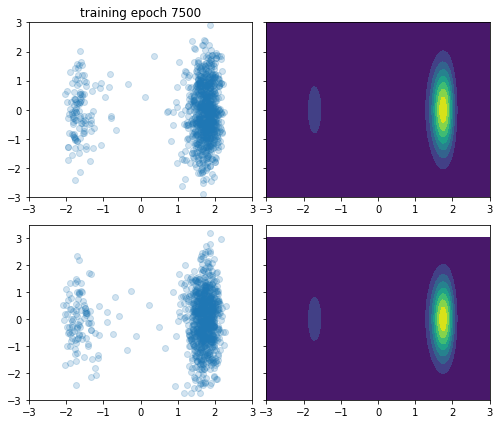

loss: -20.5033068061207, mean log p_x 17.215173722201367:  75%|███████▌  | 7502/10000 [25:20<13:42,  3.04it/s]

ESS is nan


loss: -20.463499704095256, mean log p_x 17.071738803030627:  76%|███████▋  | 7645/10000 [25:48<07:03,  5.56it/s]

Nan/Inf loss encountered


loss: -20.463499704095256, mean log p_x 17.071738803030627:  77%|███████▋  | 7691/10000 [25:57<06:52,  5.60it/s]

Nan/Inf loss encountered


loss: -20.505712283277703, mean log p_x 17.13643759970693:  77%|███████▋  | 7707/10000 [26:00<07:14,  5.27it/s] 

Nan/Inf loss encountered


loss: -20.524163684429777, mean log p_x 17.14156379179703:  78%|███████▊  | 7802/10000 [26:19<07:15,  5.05it/s]

Nan/Inf loss encountered


loss: -20.485815311809773, mean log p_x 17.06858452429537:  80%|████████  | 8000/10000 [26:58<06:11,  5.38it/s]

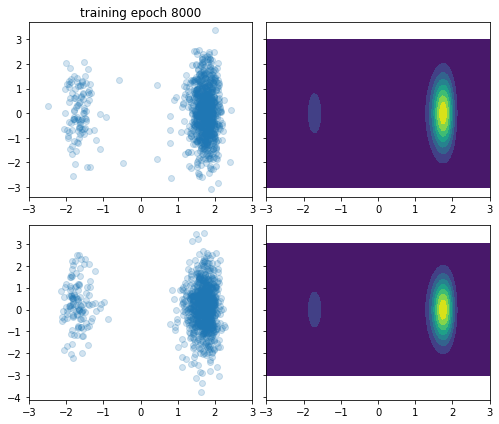

loss: -20.485815311809773, mean log p_x 17.06858452429537:  80%|████████  | 8002/10000 [26:59<11:41,  2.85it/s]

ESS is nan


loss: -20.489858329996903, mean log p_x 16.995409752375608:  84%|████████▍ | 8417/10000 [28:21<04:42,  5.60it/s]

Nan/Inf loss encountered


loss: -20.522263712473418, mean log p_x 17.13626199104886:  85%|████████▌ | 8500/10000 [28:38<04:35,  5.45it/s] 

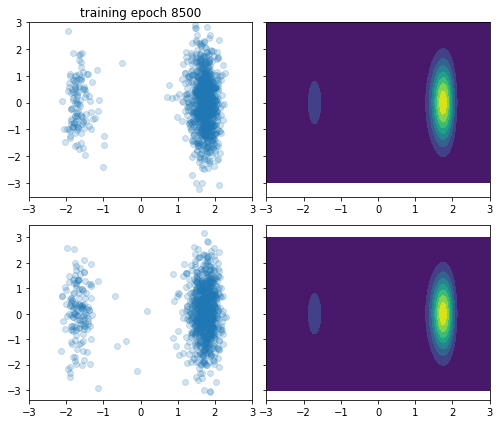

loss: -20.522263712473418, mean log p_x 17.13626199104886:  85%|████████▌ | 8502/10000 [28:38<08:18,  3.01it/s]

ESS is nan


loss: -20.51449816941859, mean log p_x 17.14334133014231:  90%|█████████ | 9000/10000 [30:17<03:49,  4.37it/s]  

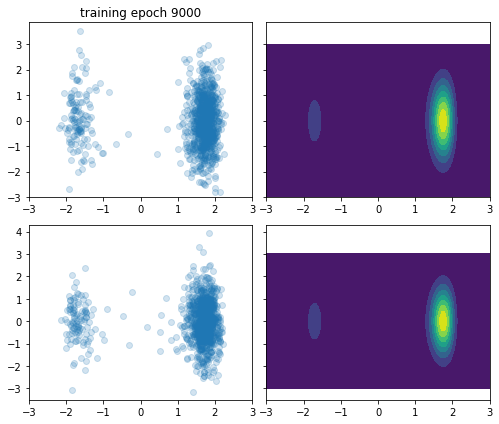

loss: -20.51449816941859, mean log p_x 17.14334133014231:  90%|█████████ | 9001/10000 [30:18<07:31,  2.21it/s]

ESS is nan


loss: -20.496556162984458, mean log p_x 17.05498751064114:  95%|█████████▌| 9500/10000 [31:56<01:37,  5.14it/s] 

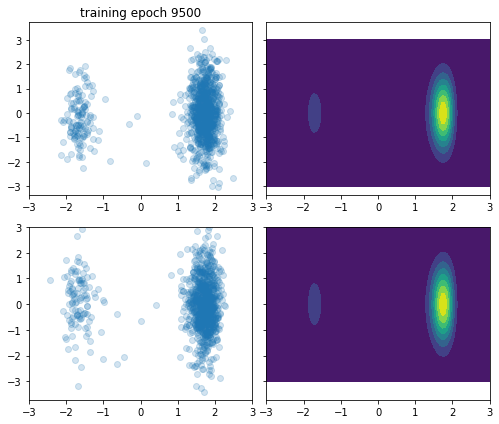

loss: -20.496556162984458, mean log p_x 17.05498751064114:  95%|█████████▌| 9502/10000 [31:57<02:46,  3.00it/s]

ESS is nan


loss: -20.53574543806495, mean log p_x 17.12555121531413: 100%|██████████| 10000/10000 [33:33<00:00,  4.97it/s] 


In [9]:
history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)

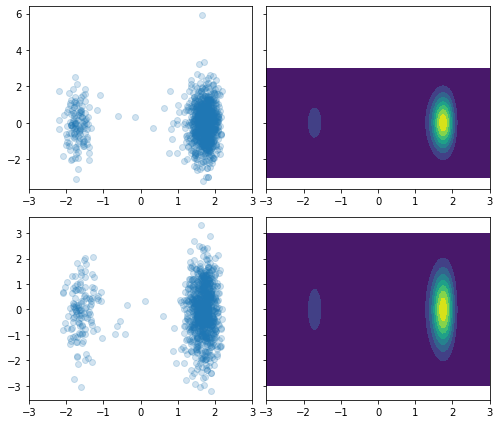

In [10]:
plotter(tester)

NaN encountered in loss history
NaN encountered in log_p_x history
NaN encountered in log_q_x history
NaN encountered in kl history
NaN encountered in alpha_2_divergence history
NaN encountered in importance_weights_var history
NaN encountered in normalised_importance_weights_var history
NaN encountered in effective_sample_size history


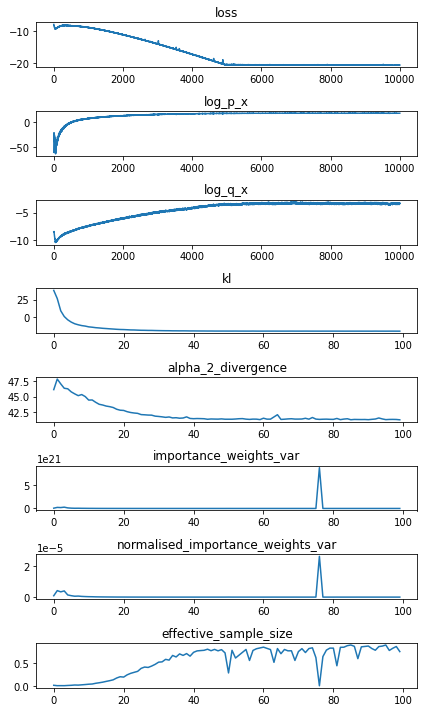

In [11]:
plot_history(history)

In [65]:
n_samples_estimation = int(2e6)

In [66]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 23.704239781420892 
estimate after training is 23.359198973644634 
effective sample size before is 0.0004108688222413588
effective sample size after train is 0.5063755571213362
variance in weights is 2.437048334844724e-13
